<a href="https://colab.research.google.com/github/Jaiharish-passion07/Third_Classification_capstone_project/blob/master/Individual_classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import time
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#All Machine learning Models are imported here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#Loading the data
df=pd.read_excel('/content/drive/MyDrive/Classification Project/data_airline_reviews.xlsx')

In [4]:
df_clean=df.loc[~df.isnull().all(axis=1),:]

In [5]:
#Shape of Cleaned data
df_clean.shape

(65947, 17)

In [6]:
#Head of Data
df_clean.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [7]:
#Statistical information about data
df_clean.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
#Remove Unwanted Column
airline_df=df_clean.drop(['airline','author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,7.0,NaN,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,2.0,NaN,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,3.0,NaN,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,10.0,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,1.0,NaN,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no




1.   Dropping __Airline&Author__ Column from the Data.Because those data does not related to my problem usecase.
2.   Dropping __Review_Date,Route,date_flown__ Column from the Data.It does not need for building a model.
3.   Dropping  __Customer_review__ from the Data. It is related to overall review from my datasets. 


In [9]:
#Percentage of null values 
airline_df.isnull().sum()/len(airline_df)*100

overall             2.926593
aircraft           70.100232
traveller_type     39.716742
cabin               4.009280
seat_comfort        7.985200
cabin_service       7.933644
food_bev           20.226849
entertainment      32.987096
ground_service     40.318741
value_for_money     2.990280
recommended         2.285168
dtype: float64

In [10]:
#Splitting the Numeric column

#Col_1 datas have low percentage of null values
col_1=['overall','seat_comfort','cabin_service','value_for_money']
#Col_2 datas have high percentage of null values
col_2=['food_bev','entertainment','ground_service']

In [11]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [12]:
#Looping the null value column
for col in col_1:
  impute_by_q1_values(airline_df,col)

In [13]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [14]:
#Looping the null value column
for col in col_2:
  median_imputation(airline_df,col)

In [15]:
#Remove Aircraft column
airline_df.drop('aircraft',axis=1,inplace=True)

In [16]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

###EDA

1)Which Traveller_type has more ratings?<br>
2)Which type of Cabin has more recommendation?<br>
3)Is it Solo Leisure worth for Money?<br>
4)In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

Qns-1:

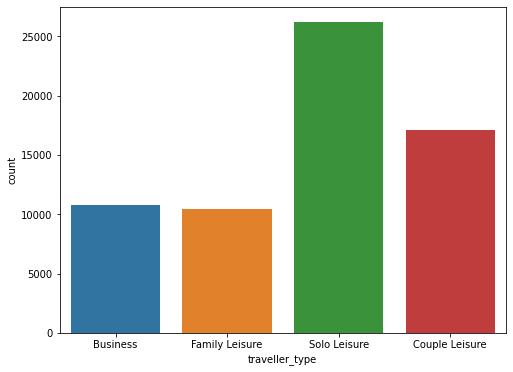

In [17]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['traveller_type'])

Qns-2:

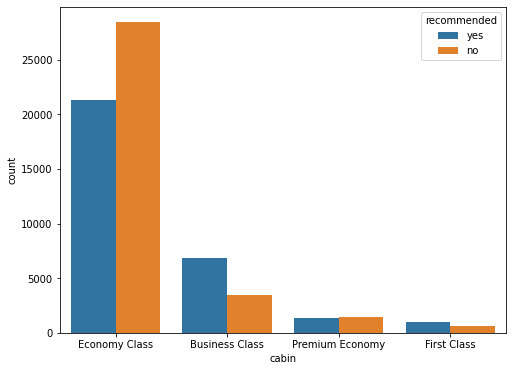

In [18]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['cabin'],hue=airline_df['recommended'])

Qns-3:

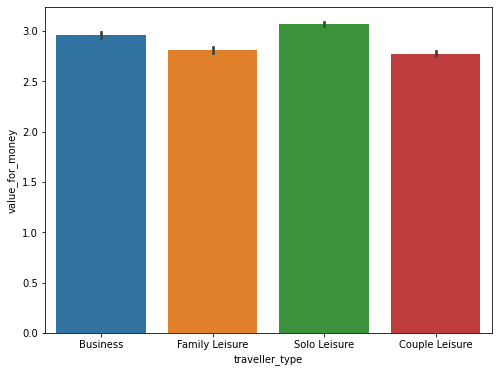

In [19]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'])

Qns-4:

In [20]:
#performing the grouphby method 
eda_4=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()

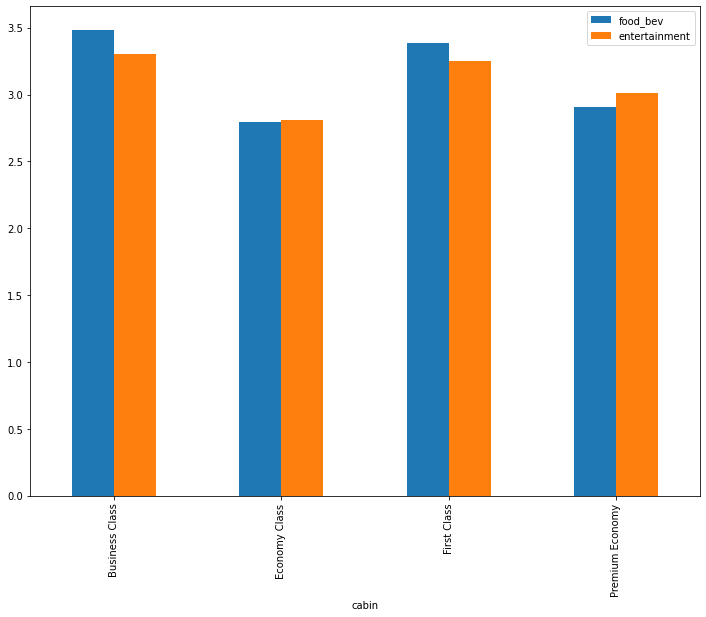

In [21]:
plt.rcParams['figure.figsize']=(12,9)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

Check Correlation

In [22]:
#mapping the target feature with numerical data
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})

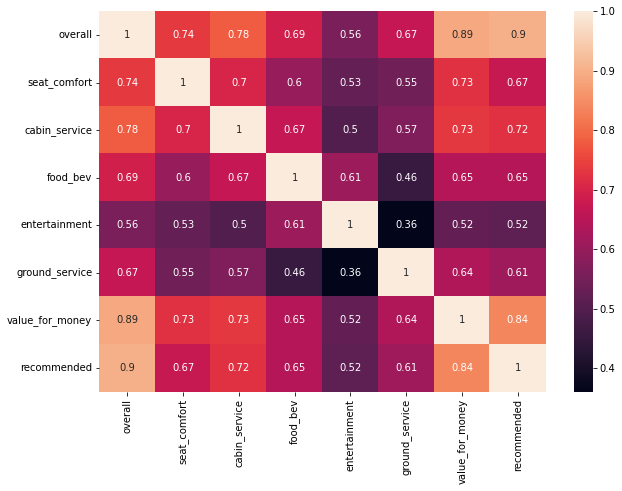

In [23]:
#setting the figure size and plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(airline_df.corr(),annot=True)

Removing Multicollinearity

In [24]:
#Creating a function to remove multicollinear
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [25]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,10.951034
1,cabin_service,13.238540
2,food_bev,12.842290
3,entertainment,9.511114
4,ground_service,8.115697


In [26]:
#Dropping Multicollinearity features
airline_df.drop(['value_for_money','overall'],axis=1,inplace=True)
airline_df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,1
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,0
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,0
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,1
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,0


Model Building

In [27]:
#Creating a copy of our dataframe
data=airline_df.copy()

In [28]:
#Performing One hot encoding
traveller_type =pd.get_dummies(data['traveller_type'],drop_first=True)
data=pd.concat([data,traveller_type],axis='columns')
cabin =pd.get_dummies(data['cabin'],drop_first=True)
data=pd.concat([data,cabin],axis='columns')
data.drop(['traveller_type','cabin'],axis=1,inplace=True)

In [29]:
X=data.drop('recommended',axis=1)
Y=data['recommended']

In [30]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.2, random_state = 42) 

Random Forest Model

In [31]:
#Starting time for Execution
start_time = time.time()

#Initializing Random Forest Model object
rand_forest_class = RandomForestClassifier()

#setting the parameters and scoring metric
scoring_rf=['f1','accuracy','roc_auc']
grid_values = {'n_estimators':[60, 80,100], 'max_depth':[5, 7],"min_samples_split":[3,5],"min_samples_leaf":[2,3]}

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
rand_forest_class = GridSearchCV(estimator=rand_forest_class, param_grid = grid_values, scoring = scoring_rf, cv=3,refit='roc_auc')

#Fitting x and y to gridsearchcv model using an estimator Random Forest Classifier
rand_forest_class.fit(X_train, y_train)

#Ending time for Execution
elapsed_time_secs = time.time() - start_time

msg = "Execution time for performing Hyperparameter tuning on Random Forest: %s Minutes " % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution time for performing Hyperparameter tuning on Random Forest: 0:01:37 Minutes 


In [32]:
#calling and best parameter
rand_forest_class.best_params_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [33]:
#Fitting an best parameters to Random Forest Classifier Model
random_forest_after_hyper_param_tune=rand_forest_class.best_estimator_
random_forest_after_hyper_param_tune.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5)

Gradient Boosting Model Build

In [34]:
#Starting time for Execution
start_time = time.time()

#Initializing Gradient Boosting Model object
grad_boost_class = GradientBoostingClassifier()

#setting the parameters and scoring metric
scoring_rf=['f1','accuracy','roc_auc']
grid_values = {'n_estimators':[80,100], 'max_depth':[5, 7],"min_samples_split":[3,5],"min_samples_leaf":[2,3]}

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
grad_boost_class = GridSearchCV(estimator=grad_boost_class, param_grid = grid_values, scoring = scoring_rf, cv=3,refit='roc_auc')

#Fitting x and y to gridsearchcv model using an estimator Gradient Boosting
grad_boost_class.fit(X_train, y_train)

#Ending time for Execution
elapsed_time_secs = time.time() - start_time

msg = "Execution time for performing Hyperparameter tuning on Gradient Boosting: %s Minutes " % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution time for performing Hyperparameter tuning on Gradient Boosting: 0:02:59 Minutes 


In [35]:
#calling and best parameters
grad_boost_class.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 80}

In [36]:
#Fitting an best parameters to Gradient Boosting model
grad_boost_after_hyperparm=grad_boost_class.best_estimator_
grad_boost_after_hyperparm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                           n_estimators=80)

In [37]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precsion scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [38]:
models=[random_forest_after_hyper_param_tune,grad_boost_after_hyperparm]
name=['Random Forest Model After Hyperparameter Tuning','Gradient Boosting Model After Hyperparameter Tuning']

In [39]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],X_train,X_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.900702    0.900683
1  Precsion_Score     0.923849    0.922059
2    Recall_Score     0.862533    0.859380
3   Roc_Auc_Score     0.898961    0.898032

-*-*--*-*--*-*-Gradient Boosting Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.906522    0.904718
1  Precsion_Score     0.919235    0.914986
2    Recall_Score     0.881071    0.876874
3   Roc_Auc_Score     0.905361    0.902930



Confusion Matrix plot

In [40]:
from sklearn.metrics import confusion_matrix
name1=['Random Forest Model Confusion Matrix','Gradient Boosting Model Confusion Matrix']

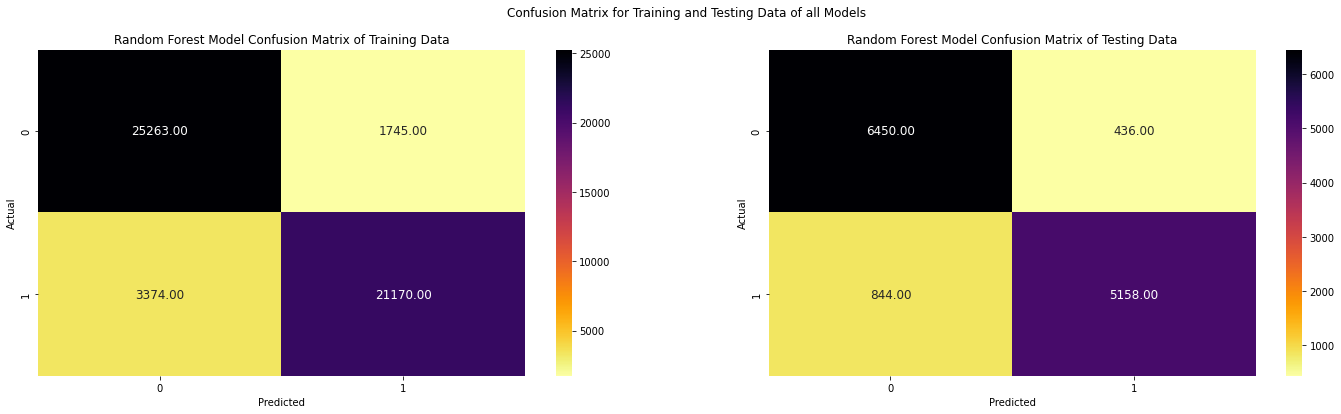

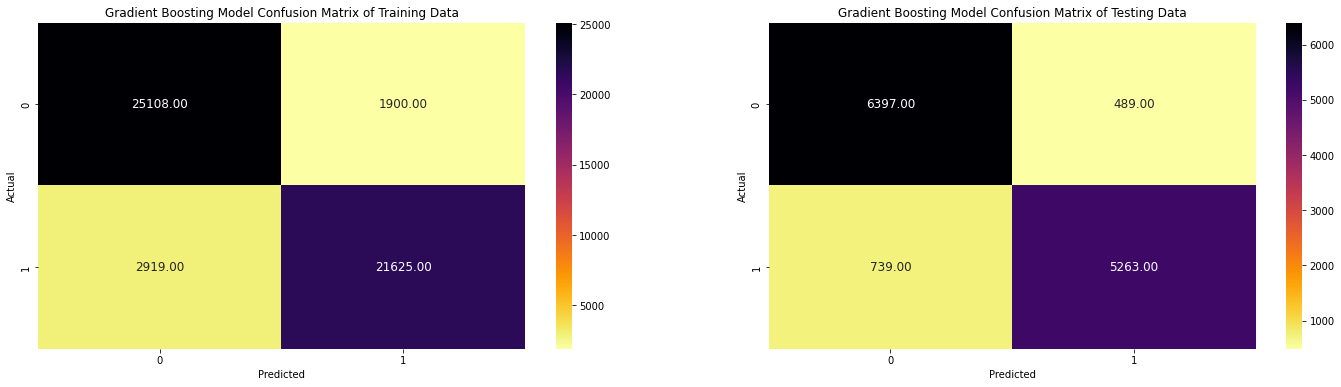

In [41]:
#Setting subplots
for model_ in range(len(models)):

  fig, ax =plt.subplots(1,2,figsize=(24,6))
  if model_==0:
    fig.suptitle('Confusion Matrix for Training and Testing Data of all Models')
  else:pass
  y_pred_train = models[model_].predict(X_train)
  y_pred_test = models[model_].predict(X_test)

  dat1_train= confusion_matrix(y_train, y_pred_train)
  dat2_test = confusion_matrix(y_test, y_pred_test)

  df_cm1 = pd.DataFrame(dat1_train, columns=np.unique(y_train), index = np.unique(y_train))
  df_cm2 = pd.DataFrame(dat2_test, columns=np.unique(y_test), index = np.unique(y_test))

  df_cm1.index.name = 'Actual'
  df_cm1.columns.name = 'Predicted'
  #sns.set(font_scale=1.4)#for label size
  df_cm2.index.name = 'Actual'
  df_cm2.columns.name = 'Predicted'

  a=sns.heatmap(df_cm1, cmap="inferno_r", annot=True,annot_kws={"size": 12},fmt='.2f',ax=ax[0])
  a.set(title=name1[model_]+' of Training Data')
  print("")
  b=sns.heatmap(df_cm2, cmap="inferno_r", annot=True,annot_kws={"size": 12},fmt='.2f',ax=ax[1])
  b.set(title=name1[model_]+' of Testing Data')
  print("")
  fig.savefig('imagename'+str(model_)+'.png')
  fig.show()

In [ ]:
import joblib

In [ ]:
model_name=["rand_forest_tuned","grad_boost_tuned"]

In [ ]:
for model_ in range(len(models)):
  #Creating a File path to save a Model
  joblib_file =model_name[model_]+".pkl"
  # Save the trained model
  joblib.dump(models[model_], joblib_file)

In [ ]:
 !pip install lime

Lime Implement

In [ ]:
# LIME Interpretation part
import lime
import lime.lime_tabular
from __future__ import print_function

In [ ]:
predict_fn_logreg = lambda x: models[0].predict_proba(x).astype(float)
predict_fn_tree= lambda x: models[1].predict_proba(x).astype(float)
predict_fn_rf = lambda x: models[2].predict_proba(x).astype(float)
predict_fn_gb = lambda x: models[3].predict_proba(x).astype(float)

In [ ]:
# Drop unwanted columns
train_df = airline_df.drop('recommended',axis=1)

In [ ]:
# Extract features
float_columns=[]
cat_columns=[]
int_columns=[]

In [ ]:
# Putting features into respective float, cat , int list.
for i in train_df.columns:
    if train_df[i].dtype == 'float' : 
        float_columns.append(i)
    elif train_df[i].dtype == 'int64':
        int_columns.append(i)
    elif train_df[i].dtype == 'object':
        cat_columns.append(i)

In [ ]:
train_cat_features = train_df[cat_columns]
train_float_features = train_df[float_columns]

In [ ]:
#One hot encoding
train_cat_features_ver2 = pd.get_dummies(train_cat_features, columns=['traveller_type','cabin'],drop_first=True)
train_cat_features_ver2.rename(columns={'traveller_type_Couple Leisure':'Couple Leisure','traveller_type_Family Leisure':'Family Leisure','traveller_type_Solo Leisure':'Solo Leisure','cabin_Economy Class':'Economy Class','cabin_First Class':'First Class','cabin_Premium Economy':'Premium Economy'},inplace=True)


In [ ]:
# Line-up the feature names
feature_names_float = list(train_float_features)
feature_names_cat = list(train_cat_features_ver2)
#feature_names_int = list(train_int_features)
feature_names = sum([feature_names_float,feature_names_cat], [])

In [ ]:
#create a unseen data
unseen_data=np.array([1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0],dtype=float)

In [ ]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = feature_names,
                                                   class_names=['0','1'],categorical_features=cat_columns, 
                                                   categorical_names=feature_names_cat, kernel_width=3)

In [ ]:
# Get the explanation for Random Forest
exp = explainer.explain_instance(unseen_data, predict_fn_rf, num_features=6)
exp.show_in_notebook(show_all=False)